In [18]:
import pandas as pd
import numpy as np
import seaborn as sns 
import re
import json
import matplotlib.pyplot as plt
import math

#file = "/content/drive/MyDrive/CSB-Karaca-dataset"

#loading the dataset
dataset = pd.read_csv("/content/drive/MyDrive/CSB-Karaca-dataset/ACE2_RBD_benchmarking_dataset.csv")

dataset.head()



,#case_id,protein,mutation_type,exp_binding,HADDOCK_ddg,HADDOCK_succ_rate,FoldX_ddg,FoldX_succ_rate,FoldXwater_ddg,FoldXwater_succ_rate,EvoEF1_ddg,EvoEF1_succ_rate,MutaBind2_ddg,MutaBind2_succ_rate,SSIPe_ddg,SSIPe_succ_rate,volume_change,hydrophobicity_change,flexibility,physicochem_class_change
0,A386C,ACE2,RD,-0.660831,2.9344,1,0.00,1,0.00,1,-0.04,0,0.32,1,0.191,1,0.09205,-0.33,2,no_change
1,A386E,ACE2,RD,-0.860380,-1.2738,0,0.16,1,0.20,1,0.05,1,0.25,1,0.222,1,0.27135,-1.36,8,charge_gain
2,A386I,ACE2,E,1.651590,-3.2524,1,-0.22,1,-0.26,1,-0.01,1,0.28,0,0.202,0,0.31969,0.76,8,no_change
3,A386L,ACE2,E,2.678300,-1.2976,1,0.12,0,-0.39,1,-0.12,1,0.30,0,0.161,0,0.32174,0.44,8,no_change
4,A386M,ACE2,E,0.323907,-1.0240,1,-0.06,1,-0.08,1,-0.12,1,0.20,0,0.161,0,0.33170,0.02,26,no_change


#common data structure utilities

In [19]:
#occurence of each key in the list
def occurence(key, list):
  result = 0

  for i in range(len(list)):
    if key == list[i]:
      result+=1
  return result

In [20]:
#dissects all mutation info from dataset for easier access
def get_residues(protein, indices):
  positions = []       #list of repeated positions
  positions_resi = {}  #dict of positions and their residues
  mutations = []       #list of all final residues after mutation
  mutations_resi = []  #list contains arrays as [position, mutation, 
                       #                        vol_change, hydro, flex, physio]

  for i in indices:
      if dataset['protein'][i] == protein: # and dataset['mutation_type'][i] == 'E':
        
        #residue position of mutation
        pos = int(re.search(r'\d+', dataset['#case_id'][i]).group()) 

        #amino acid letter of the native residue
        resi = dataset['#case_id'][i][0] 

        #[position : native residue] dictionary
        positions_resi.update({pos: resi}) 

        #list of repeated positions
        positions.append(pos) 

        
        muta_name_size = len(dataset['#case_id'][i])
        #amino acid after mutation
        mut = dataset['#case_id'][i][muta_name_size-1]

        #mutation at position
        mutations.append(mut) 
        mutations_resi.append([pos, mut, dataset['volume_change'][i]
                               , dataset['hydrophobicity_change'][i]
                               , dataset['flexibility'][i]
                               , dataset['physicochem_class_change'][i]]) 
        
  return positions, positions_resi, mutations, mutations_resi

In [21]:
#positions and corresponding occurence of mutations on each
def calculate_residue(uniq_resi, all_positions):
  positions = []
  occurences = []

  for pos in uniq_resi:
    positions.append(pos)
    occurences.append(occurence(pos, all_positions))

  return positions, occurences

In [22]:
#returns repeated list of native amino acids
def get_native_residues(result, resi):
  out = []
  for i in range(len(result[0])):
    resi_char = resi.get(result[0][i])
    out.append(resi_char)

  return out

# dictionary of amino acid properties

In [23]:
#amino acids' chemical properties
residue_properties = {'A' : 'non-polar', 
                      'R' : 'charge',
                      'N' : 'polar',
                      'D' : 'charge',
                      'C' : 'non-polar',
                      'Q' : 'polar',
                      'E' : 'charge',
                      'G' : 'non-polar',
                      'H' : 'charge',
                      'I' : 'non-polar',
                      'L' : 'non-polar',
                      'K' : 'charge',
                      'M' : 'non-polar',
                      'F' : 'non-polar',
                      'P' : 'non-polar',
                      'S' : 'polar',
                      'T' : 'polar',
                      'W' : 'non-polar',
                      'Y' : 'polar',
                      'V' : 'non-polar'}

####

####


#calculating occurences of enriched cases
#####result[0]: position
#####result[1]: mutation occurence number

In [24]:
#positions: repeated (all) positions
#native_resi: dict of pos: resi
#mutations: repeated (all) mutation residues
#mut_resi: list of arrays [pos, mutation resi]

positions_ace2, native_resi_ace2, mutations_ace2, mut_resi_ace2 = get_residues('ACE2',range(len(dataset)))
positions_rbd, native_resi_rbd, mutations_rbd, mut_resi_rbd = get_residues('RBD',range(len(dataset)))

#unique: no repetition residue positions
unique_ace2 = set(positions_ace2)
unique_ace2 = sorted(unique_ace2)

unique_rbd = set(positions_rbd)
unique_rbd = sorted(unique_rbd)


#result[0]: position, result[1]: mutation occurence
result_ace2 = calculate_residue(unique_ace2, positions_ace2)
result_rbd = calculate_residue(unique_rbd, positions_rbd)

####
print(len(positions_rbd))
print(unique_rbd)
print(positions_ace2)
print(len(unique_ace2))
print(result_rbd[0])
print(result_rbd[1])
print(native_resi_ace2)
print(native_resi_ace2.get(386))
print(mut_resi_rbd)
print(mutations_ace2)
####

84
[403, 417, 445, 446, 453, 455, 456, 473, 476, 477, 484, 487, 489, 490, 493, 498, 500, 501, 502, 503, 505]
[386, 386, 386, 386, 386, 386, 30, 30, 30, 30, 30, 30, 30, 30, 355, 355, 355, 355, 38, 38, 38, 38, 38, 35, 35, 35, 35, 35, 35, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 326, 326, 326, 326, 326, 326, 354, 354, 354, 354, 34, 34, 34, 34, 34, 34, 34, 31, 31, 31, 31, 31, 353, 353, 353, 353, 353, 353, 353, 353, 353, 45, 45, 45, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 82, 82, 82, 82, 82, 330, 330, 330, 330, 330, 330, 330, 330, 24, 24, 24, 24, 325, 325, 325, 325, 325, 325, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 357, 357, 357, 357, 357, 357, 357, 357, 393, 393, 393, 393, 393, 19, 19, 19, 19, 19, 19, 19, 19, 19, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 324, 324, 324, 324, 324, 324, 41, 41, 41, 41, 41, 83, 83, 83, 83, 83, 83, 83]
26
[403, 417, 445, 446, 453, 455, 456, 473, 476, 477, 484, 487, 489, 490, 493, 498, 500, 501, 502, 503, 505]
[1,

##bar plot residues for occurence

In [25]:
def bar_plot_new(result, resi):
  x = [str(x) for x in result[0]]
  axes = []
  fig = plt.figure(figsize=(15, 4))
  fig.add_axes([0,0,1,1])
  colors= []

  for i in range(len(x)):
    residue = resi.get(result[0][i])
    axes.append(residue + x[i]) #adding native amino acids
   

  df = pd.DataFrame({"Residues":axes, "Occurence":result[1]})
  data_sorted = df.sort_values('Occurence',ascending=False)
  residues = np.asarray(data_sorted['Residues'])
  #print(data_sorted)
  #print(residues)
  for res in residues:
    
    if residue_properties.get(res[0]) == 'non-polar':
      colors.append('orange')
    
    if residue_properties.get(res[0]) == 'polar':
      colors.append('red')
  
    if residue_properties.get(res[0]) == 'charge':
      colors.append('blue')

  plt.rc('axes', labelsize = 10)
  plt.bar('Residues','Occurence', data = data_sorted, color = colors)

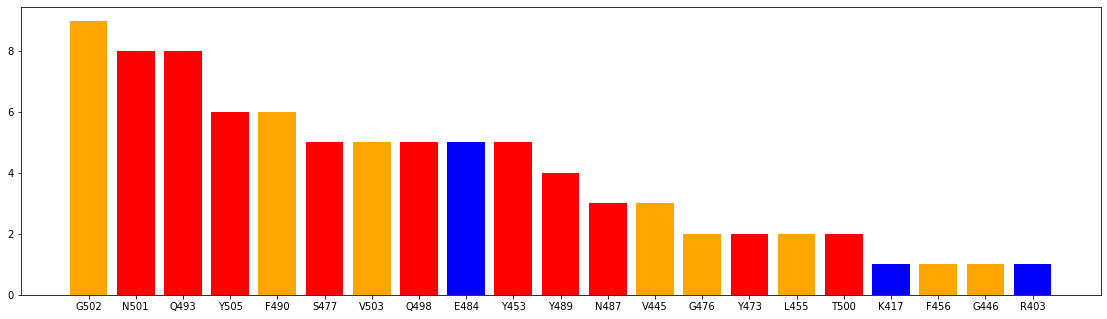

In [26]:
bar_plot_new(result_rbd, native_resi_rbd)
plt.savefig("/content/drive/MyDrive/CSB-Karaca-dataset/s1_b_rbd_most_freq_resi.pdf",dpi=300, bbox_inches="tight")

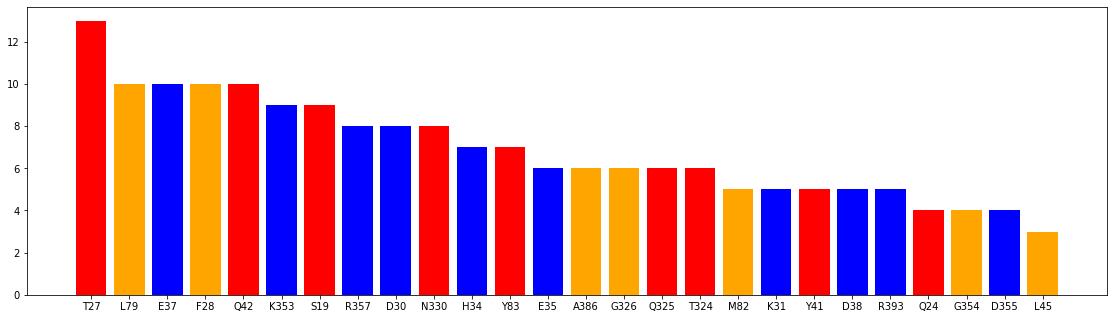

In [27]:
bar_plot_new(result_ace2, native_resi_ace2)
plt.savefig("/content/drive/MyDrive/CSB-Karaca-dataset/s1_a_ace2_most_freq_resi.pdf", dpi=300, bbox_inches="tight")

In [28]:
#bar plot for residue occurence counts
def bar_plot_resi(result,resi):
  
  fig = plt.figure()
  fig.add_axes([0,0,3,1])

  #getting residue positions
  x = [str(x) for x in result[0]]
  axes = []
  for i in range(len(x)):
    axes.append(resi.get(result[0][i])+ x[i]) #adding native amino acids

  df = pd.DataFrame({"Residues":axes, "Occurence":result[1]})

  sns.barplot(x="Residues", y="Occurence", data=df, order=df.sort_values("Occurence",ascending = False).Residues)
  plt.tight_layout()
  plt.show()
  return axes, result[1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  app.launch_new_instance()


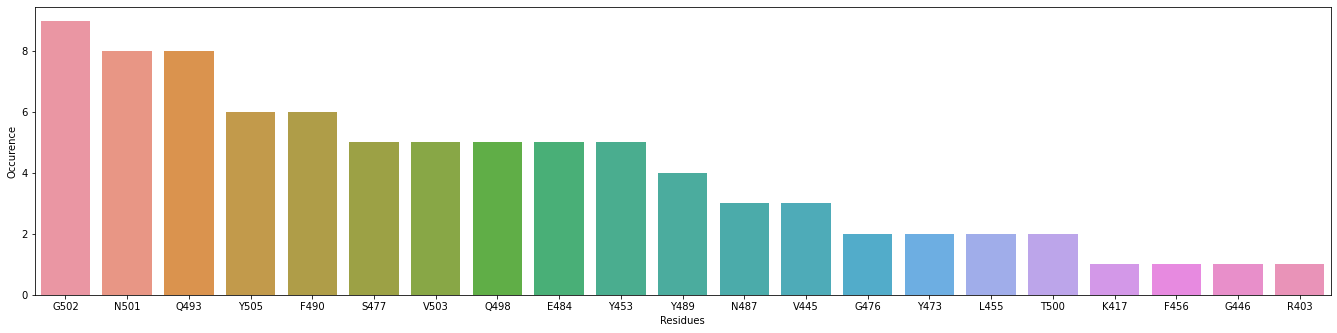

84

In [29]:
ax, res = bar_plot_resi(result_rbd, native_resi_rbd)
sum(res)

#all agreed voting results

In [30]:
#dataset indices for voting results:

all_failed = [7, 9, 61, 64, 83, 84, 86, 112, 114, 116, 117, 120, 121, 130, 136, 
              143, 160, 164, 166, 190, 196, 202, 205, 206, 213, 218, 221, 223, 237, 240, 256, 259, 262]


all_succ =  [2, 4, 6, 8, 14, 16, 18, 19, 23, 24, 26, 27, 28, 29, 31, 32,
            37, 53, 54, 73, 87, 90, 92, 94, 95, 98, 100, 101, 102, 104, 107,
            110, 111, 113, 118, 119, 123, 126, 131, 165, 167, 172, 173, 176,
            208, 209, 216, 217, 226, 229, 230, 231, 232, 233, 234, 235, 236, 238, 
            246, 247, 249, 250, 251, 252, 253, 254, 257, 258, 260, 261]

enrich_all_succ = [2, 4, 23, 24, 26, 27, 28, 53, 90, 94, 110, 113, 118, 119, 126, 131, 
                   165, 167, 172, 173, 176, 208, 209, 216, 217, 226, 229, 230, 231, 232, 233]
            

deplet_all_succ =  [6, 8, 14, 16, 18, 19, 29, 31, 32, 37, 54, 73, 87, 92, 95, 98, 100, 
                    101, 102, 104, 107, 111, 123, 234, 235, 236, 238, 246, 247, 249,
                    250, 251, 252, 253, 254, 257, 258, 260, 261]


no_voting = range(len(dataset))

#this is for combining all failed and success cases in a graph, to represent x-axis
for_stacked = all_failed+ all_succ


In [31]:
#residue counting for voting success-fail stacked bar graph
#all is for all success

#if want to switch to RBD change get_residues#
pos_all, native_resi_all, mutations_all, mut_resi_all = get_residues('ACE2',for_stacked) #insert for_stacked for stackedbarplot
result_all = calculate_residue(sorted(set(pos_all)),pos_all)

deplet_pos, native_resi_deplet, mutations_deplet, mut_resi_deplet = get_residues('ACE2',deplet_all_succ)
result_deplet = calculate_residue(sorted(set(deplet_pos)),deplet_pos)

fail_pos, native_resi_fail, mutations_fail, mut_resi_fail = get_residues('ACE2',all_failed)
result_fail = calculate_residue(sorted(set(fail_pos)),fail_pos)

enrich_pos, native_resi_enrich, mutations_enrich, mut_resi_enrich = get_residues('ACE2',enrich_all_succ)
result_enrich = calculate_residue(sorted(set(enrich_pos)),enrich_pos)


##stacked bar plot

In [32]:
#represents voting results as a stacked bar plot
def stacked_barplot(enrich, deplet, all_failed, names, protein):

  # Heights of bars1 + bars2
  bars = np.add(enrich, deplet).tolist()
  
  # The position of the bars on the x-axis
  r = [9*i for i in range(len(names))]
  
  barWidth = 8
  
  plt.title('All agreed/failed voting for ' + protein)
  plt.xticks(r, names, rotation=55)
  plt.xlabel("Residues")
  plt.ylabel('Voting Results')

  plt.bar(r, enrich, color='#9acd32', edgecolor='white', width=barWidth)
  plt.bar(r, deplet, bottom=enrich, color='#5F9EA0', edgecolor='white', width=barWidth)
  plt.bar(r, all_failed, bottom=bars, color='#c0c0c0', edgecolor='white', width=barWidth)
  
  
  #plt.figure(figsize=(50, 50))
  

In [33]:
#zero fills voting results of enriched, depleted and failed
#for representing them on the same stacked bar plot (so that dimensions match)
def zero_fill(all_axes, to_fill, to_fill_vals):
  result = []
  
  for i in all_axes:
    found = 0
    for k in range(len(to_fill)):
      if i==to_fill[k]:
        found = 1
        result.append(to_fill_vals[k])
    if not found:
       result.append(0)
  
  return result

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  app.launch_new_instance()


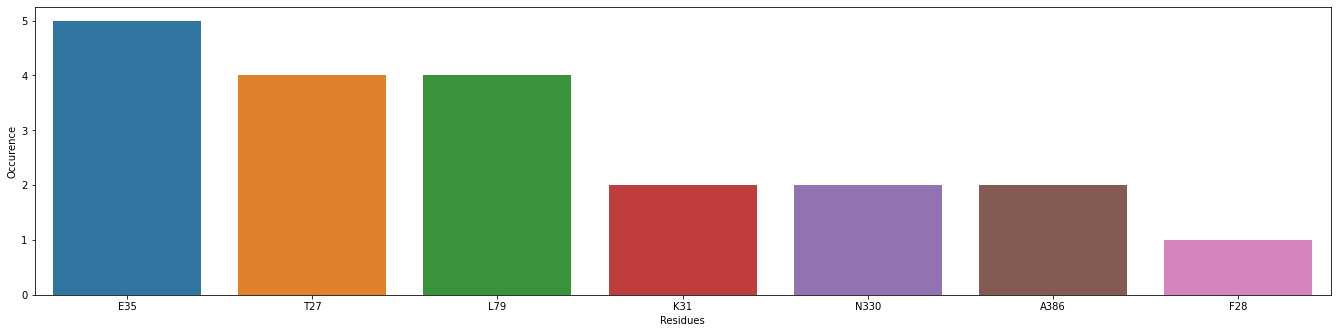

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  app.launch_new_instance()


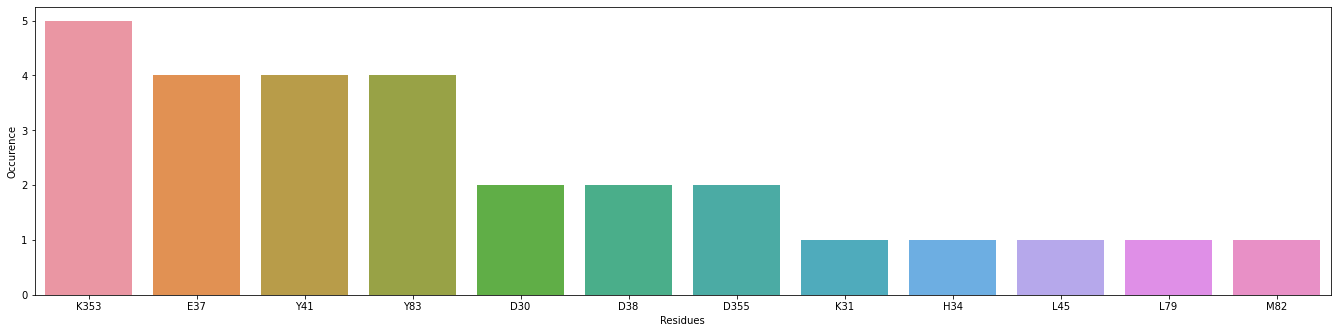

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  app.launch_new_instance()


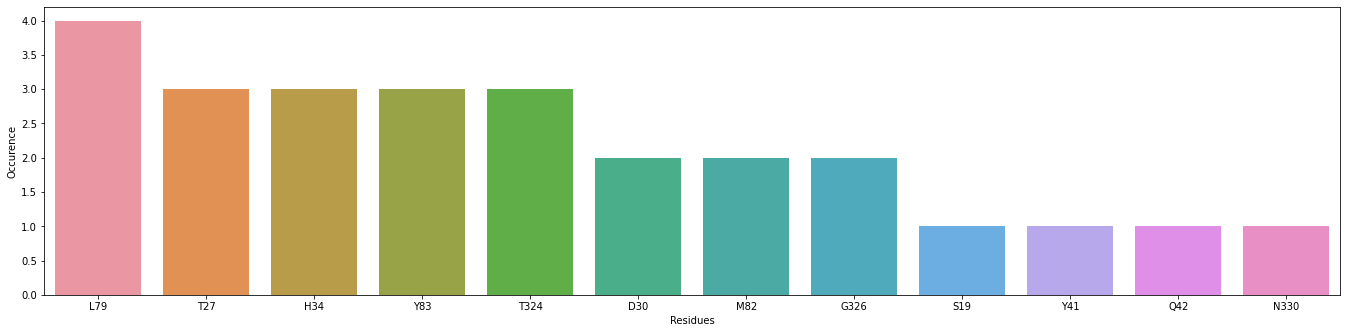

['T27', 'F28', 'K31', 'E35', 'L79', 'N330', 'A386']
[4, 1, 2, 5, 4, 2, 2]
['D30', 'K31', 'H34', 'E37', 'D38', 'Y41', 'L45', 'L79', 'M82', 'Y83', 'K353', 'D355']
[2, 1, 1, 4, 2, 4, 1, 1, 1, 4, 5, 2]
['S19', 'T27', 'D30', 'H34', 'Y41', 'Q42', 'L79', 'M82', 'Y83', 'T324', 'G326', 'N330']
[1, 3, 2, 3, 1, 1, 4, 2, 3, 3, 2, 1]


In [34]:
#getting the residues and voting success/fail counts by silencing the bar plot for occurence
enrich_ax, enrich_count = bar_plot_resi(result_enrich,native_resi_enrich)
deplet_ax, deplet_count = bar_plot_resi(result_deplet,native_resi_deplet)
fail_ax, fail_count = bar_plot_resi(result_fail,native_resi_fail)

####
print(enrich_ax)
print(enrich_count)

print(deplet_ax)
print(deplet_count)

print(fail_ax)
print(fail_count)
####


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  app.launch_new_instance()


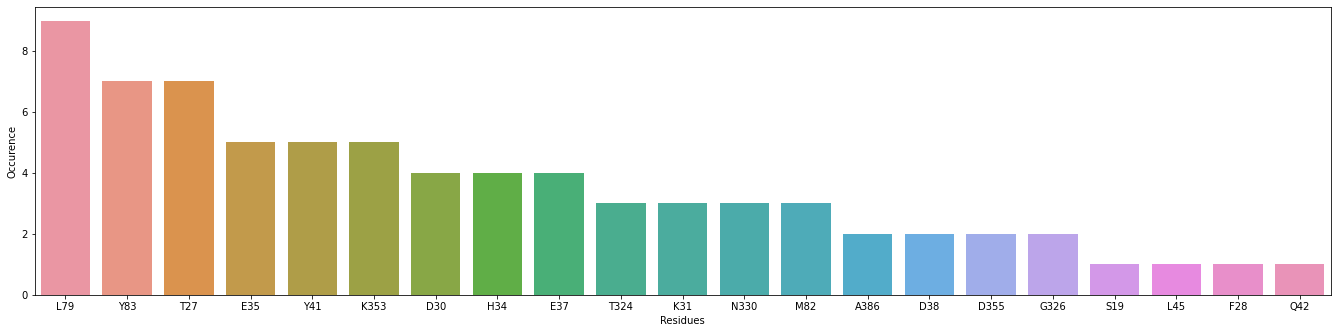

[1, 7, 1, 4, 3, 4, 5, 4, 2, 5, 1, 1, 9, 3, 7, 3, 2, 3, 5, 2, 2]
['S19', 'T27', 'F28', 'D30', 'K31', 'H34', 'E35', 'E37', 'D38', 'Y41', 'Q42', 'L45', 'L79', 'M82', 'Y83', 'T324', 'G326', 'N330', 'K353', 'D355', 'A386']


In [35]:
all_axes, count_all = bar_plot_resi(result_all,native_resi_all)
print(count_all)
print(all_axes)

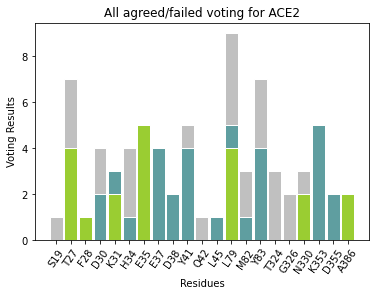

In [36]:
enrich_count = zero_fill(all_axes, enrich_ax, enrich_count)
deplet_count = zero_fill(all_axes, deplet_ax, deplet_count)
fail_count = zero_fill(all_axes, fail_ax, fail_count)

stacked_barplot(enrich_count,deplet_count, fail_count, all_axes, 'ACE2')
plt.savefig("/content/drive/MyDrive/CSB-Karaca-dataset/all_agreed_failed_ace2.pdf", dpi=300)

In [37]:
#bar_plot_resi(result_rbd,native_resi_rbd)

# Grouped barploting

In [38]:
#group bar plot for amino acid properties before and after mutation
def group_barplotting(y1, y2, y3, x_labels,before_or_after):
  x = np.arange(len(x_labels))
  width = 0.2 

  plt.xticks(x, x_labels)
  plt.xlabel("Amino Acids")
  plt.ylabel("Residue properties " + before_or_after +" mutation")
  plt.legend(["non-polar", "polar", "charge"])

  plt.bar(x-0.2, y1, width, color='orange')
  plt.bar(x, y2, width, color='red')
  plt.bar(x+0.2, y3, width, color='blue')
  

In [39]:
#repeated list of all amino acids' properties by residue
def counting_mutations_properties(mutations):
  result = []

  for m in mutations:
      result.append(residue_properties.get(m))
    
  return result

In [40]:
#for group bar plotting creates y axes for representing amino acid properties
#groups are list of amino acids (repeated)
def y_axes_for_gbp(groups):
  y1, y2, y3 = [], [], []
  for i in range(len(groups)):
    s =  json.loads(pd.Series(counting_mutations_properties(groups[i])).value_counts().to_json())
    print(s)
    y1.append(s.get('non-polar'))
    y2.append(s.get('polar'))
    y3.append(s.get('charge'))
  
  y1 = [0 if i == None else i for i in y1]
  y2 = [0 if i == None else i for i in y2]
  y3 = [0 if i == None else i for i in y3]

  return y1,y2,y3

##all agreed cases 

{'charge': 7, 'non-polar': 3, 'polar': 2}
{'non-polar': 2, 'polar': 2, 'charge': 1}
{'non-polar': 20, 'polar': 4, 'charge': 4}
{'non-polar': 7, 'polar': 2, 'charge': 2}


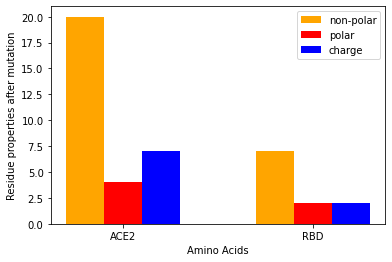

In [41]:
#for all agreed graphs
calculating_for = deplet_all_succ

pos_agreed_ace2, native_resi_agreed_ace2, mutations_agreed_ace2, mut_resi_agreed_ace2 = get_residues('ACE2',calculating_for)
result_agreed_ace2 = calculate_residue(sorted(set(pos_agreed_ace2)),pos_agreed_ace2)

pos_agreed_rbd, native_resi_agreed_rbd, mutations_agreed_rbd, mut_resi_agreed_rbd = get_residues('RBD',calculating_for)
result_agreed_rbd = calculate_residue(sorted(set(pos_agreed_rbd)),pos_agreed_rbd)


agreed_ace2 = get_native_residues(result_agreed_ace2, native_resi_agreed_ace2)
agreed_rbd = get_native_residues(result_agreed_rbd, native_resi_agreed_rbd)

y1,y2, y3 = y_axes_for_gbp([agreed_ace2,agreed_rbd])
group_barplotting(y1,y2,y3, ['ACE2', 'RBD'],'before')


y1, y2, y3 = y_axes_for_gbp([mutations_agreed_ace2, mutations_agreed_rbd])
group_barplotting(y1,y2,y3, ['ACE2', 'RBD'],'after')

##only enriched cases

{'charge': 10, 'polar': 9, 'non-polar': 7}
{'polar': 10, 'non-polar': 8, 'charge': 3}
['S', 'Q', 'T', 'F', 'D', 'K', 'H', 'E', 'E', 'D', 'Y', 'Q', 'L', 'L', 'M', 'Y', 'T', 'Q', 'G', 'N', 'K', 'G', 'D', 'R', 'A', 'R']
{386: 'A', 30: 'D', 355: 'D', 38: 'D', 35: 'E', 37: 'E', 28: 'F', 326: 'G', 354: 'G', 34: 'H', 31: 'K', 353: 'K', 45: 'L', 79: 'L', 82: 'M', 330: 'N', 24: 'Q', 325: 'Q', 42: 'Q', 357: 'R', 393: 'R', 19: 'S', 27: 'T', 324: 'T', 41: 'Y', 83: 'Y'}
26


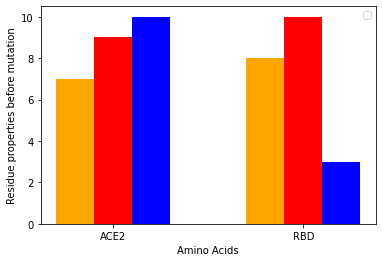

In [42]:
characters_ace2 = get_native_residues(result_ace2, native_resi_ace2)
characters_rbd = get_native_residues(result_rbd, native_resi_rbd)

y1,y2, y3 = y_axes_for_gbp([characters_ace2,characters_rbd])
group_barplotting(y1,y2,y3, ['ACE2', 'RBD'],'before')

####
print(characters_ace2)
print(native_resi_ace2)
print(len(result_ace2[0]))
####
#plt.savefig("/content/drive/MyDrive/CSB-Karaca-dataset/s2_A_enriching_prop_analysis.pdf", dpi=300)

{'non-polar': 101, 'charge': 40, 'polar': 38}
{'non-polar': 44, 'charge': 21, 'polar': 19}
[101, 44]
[38, 19]
[40, 21]
['C', 'E', 'I', 'L', 'M', 'Q', 'A', 'E', 'F', 'I', 'N', 'P', 'T', 'V', 'I', 'K', 'M', 'P', 'C', 'G', 'R', 'W', 'Y', 'A', 'C', 'D', 'M', 'Q', 'V', 'C', 'F', 'G', 'I', 'K', 'L', 'M', 'R', 'T', 'V', 'C', 'E', 'G', 'K', 'L', 'N', 'Q', 'T', 'V', 'Y', 'C', 'F', 'H', 'T', 'W', 'Y', 'I', 'K', 'Q', 'Y', 'A', 'F', 'K', 'P', 'Q', 'S', 'V', 'F', 'M', 'P', 'W', 'Y', 'A', 'D', 'E', 'G', 'H', 'R', 'S', 'V', 'W', 'G', 'I', 'K', 'F', 'G', 'I', 'M', 'P', 'R', 'T', 'V', 'W', 'Y', 'C', 'G', 'L', 'P', 'R', 'D', 'F', 'H', 'L', 'Q', 'R', 'W', 'Y', 'F', 'K', 'T', 'Y', 'G', 'H', 'P', 'S', 'T', 'Y', 'C', 'H', 'I', 'K', 'L', 'M', 'R', 'T', 'V', 'W', 'A', 'D', 'E', 'F', 'G', 'I', 'N', 'P', 'A', 'H', 'K', 'M', 'S', 'F', 'I', 'L', 'N', 'P', 'T', 'V', 'W', 'Y', 'A', 'C', 'D', 'F', 'H', 'K', 'L', 'M', 'P', 'R', 'S', 'W', 'Y', 'A', 'E', 'G', 'P', 'Q', 'S', 'A', 'I', 'M', 'R', 'W', 'C', 'D', 'E', 'L', 

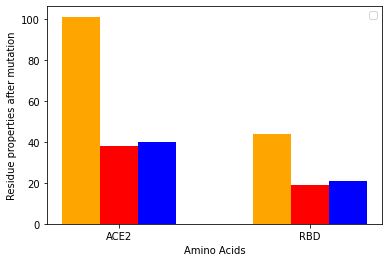

In [43]:
y1, y2, y3 = y_axes_for_gbp([mutations_ace2, mutations_rbd])
group_barplotting(y1,y2,y3, ['ACE2', 'RBD'],'after')

####
print(y1)
print(y2)
print(y3)
print(mutations_ace2)
####
#plt.savefig("/content/drive/MyDrive/CSB-Karaca-dataset/s2_b_enriching_prop_analysis_after.pdf", dpi=300)

In [44]:
#gives a list of all mutation residues at a location
def get_mutations(pos, mut_resi):
  out = []
  for mut in mut_resi:
    if mut[0] == pos:
      out.append(mut[1])
  return out

{'non-polar': 7, 'charge': 4, 'polar': 2}
{'non-polar': 6, 'charge': 3, 'polar': 1}
{'non-polar': 7, 'polar': 2, 'charge': 1}
{'non-polar': 6, 'polar': 3}


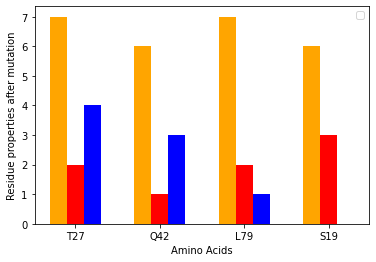

In [45]:
#ACE2 frequent positions mutation properties
mutations_freq_resi_ace2 = []
positions_freq_ace2 = [27, 42, 79, 19]
for i in positions_freq_ace2:
  mutations_freq_resi_ace2.append(get_mutations(i, mut_resi_ace2))

y1,y2,y3 = y_axes_for_gbp(mutations_freq_resi_ace2)
group_barplotting(y1,y2,y3, ['T27', 'Q42', 'L79', 'S19'],'after')
#plt.savefig("/content/drive/MyDrive/CSB-Karaca-dataset/s2_c.pdf", dpi=300)

{'non-polar': 6, 'polar': 1, 'charge': 1}
{'charge': 2, 'non-polar': 2, 'polar': 1}
{'polar': 2, 'non-polar': 2, 'charge': 2}
{'polar': 4, 'non-polar': 4}
{'non-polar': 3, 'charge': 2}


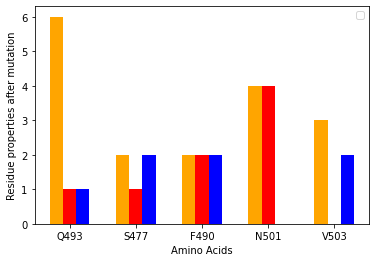

In [46]:
#RBD frequent positions mutation properties
mutations_freq_resi_rbd = []
positions_freq_rbd = [493, 477, 490, 501, 503]
for i in positions_freq_rbd:
  mutations_freq_resi_rbd.append(get_mutations(i, mut_resi_rbd))


y1,y2,y3 = y_axes_for_gbp(mutations_freq_resi_rbd)

group_barplotting(y1,y2,y3, ['Q493', 'S477', 'F490', 'N501', 'V503'],'after')
#plt.savefig("/content/drive/MyDrive/CSB-Karaca-dataset/s2_d_rbd_most_freq_analysis.pdf", dpi=300)

# Effects of mutations bar plots

In [47]:
#2: volume, 3: hydro, 4: flex, 5:physiochem
def quality_to_quantity_barplot(mut_resi_matrix1, mut_resi_matrix2, mod, title):
  quantity_ace2 = mut_resi_matrix1[:,mod]
  quantity_rbd = mut_resi_matrix2[:,mod]
  qualitative_ace2 = []
  qualitative_rbd = []

  for i in range(len(quantity_ace2)):
    qualitative_ace2.append('increase' if float(quantity_ace2[i]) > 0 else 'decrease')

  for i in range(len(quantity_rbd)):
    qualitative_rbd.append('increase' if float(quantity_rbd[i]) > 0 else 'decrease')


  plt.subplot(121)
  plt.title('ACE2')
  plt.ylabel(title)
  pd.Series(qualitative_ace2).value_counts(normalize=True).plot.bar({"increase": "green", "decrease": "red"})
 

  plt.subplot(122)
  plt.title('RBD')
  pd.Series(qualitative_rbd).value_counts(normalize=True).plot(kind = 'bar')


['386' 'E' '0.27135' '-1.36' '8' 'charge_gain']


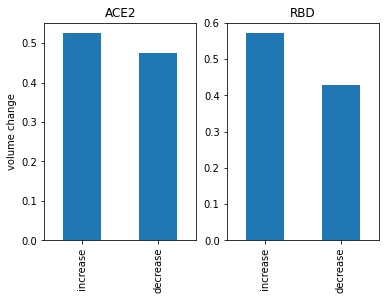

In [48]:
mut_resi_ace2_matrix = np.asarray(mut_resi_ace2)
mut_resi_rbd_matrix = np.asarray(mut_resi_rbd)
print(mut_resi_ace2_matrix[1])

#0: position, 1: mutant resi, 2: volume, 3: hydro, 4: flex, 5:physiochem
quality_to_quantity_barplot(mut_resi_ace2_matrix, mut_resi_rbd_matrix, 2, 'volume change' )


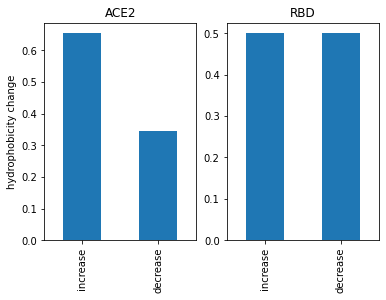

In [49]:
quality_to_quantity_barplot(mut_resi_ace2_matrix, mut_resi_rbd_matrix, 3, 'hydrophobicity change')

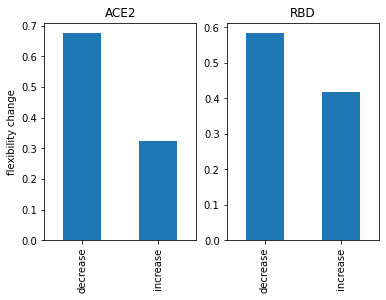

In [50]:
quality_to_quantity_barplot(mut_resi_ace2_matrix, mut_resi_rbd_matrix, 4, 'flexibility change')

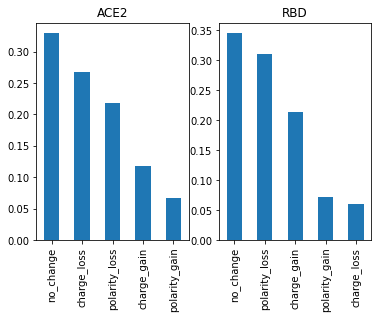

In [51]:
plt.subplot(121)
plt.title('ACE2')
pd.Series(mut_resi_ace2_matrix[:,5]).value_counts(normalize=True).plot(kind = 'bar')

plt.subplot(122)
plt.title('RBD')
pd.Series(mut_resi_rbd_matrix[:,5]).value_counts(normalize=True).plot(kind = 'bar')

# Residue frequency bar plot by their properties

In [52]:
def properties_per_resi_barplot(frequent_mut):
  plt.figure(figsize=(20, 4))
  colors =[]
  counts = pd.Series(frequent_mut).value_counts()
  print(counts.index)
  print(np.asarray(counts))
  for c in counts.index:
    if residue_properties.get(c) == 'non-polar': 
      colors.append('orange')

    if residue_properties.get(c) == 'polar': 
     colors.append('red')
  
    if residue_properties.get(c) == 'charge': 
      colors.append('blue')
  
  plt.xlabel('Amino Acids')
  plt.ylabel('Occurence')
  plt.rc('xtick', labelsize  = 14)
  plt.rc('ytick', labelsize = 14)
  
  plt.bar(counts.index, np.asarray(counts), color=colors)
  
 

Index(['W', 'M', 'L', 'F', 'Y', 'R', 'P', 'T', 'V', 'I', 'K', 'C', 'H', 'N',
       'A', 'D', 'S', 'G'],
      dtype='object')
[4 3 3 3 3 3 3 3 3 3 2 2 2 1 1 1 1 1]


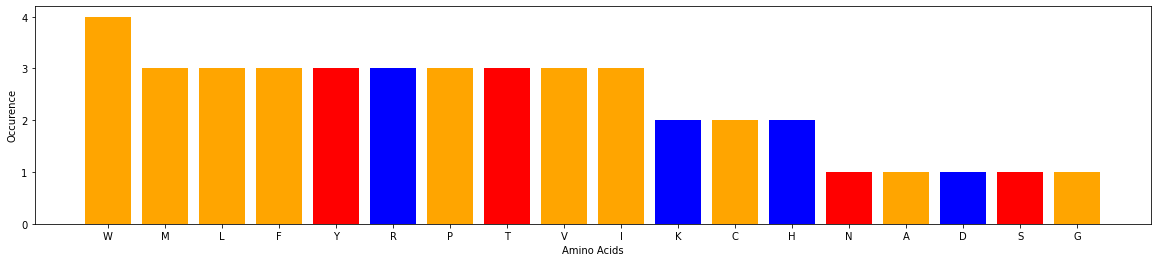

In [53]:
frequent_mut_ace2 = get_mutations(42, mut_resi_ace2) + get_mutations(27, mut_resi_ace2) + get_mutations(79, mut_resi_ace2) + get_mutations(19, mut_resi_ace2)
properties_per_resi_barplot(frequent_mut_ace2)
#plt.savefig("/content/drive/MyDrive/CSB-Karaca-dataset/s2_e_ace2_most_freq_mutations.pdf", dpi=300)


Index(['K', 'Y', 'M', 'L', 'N', 'A', 'V', 'R', 'W', 'F', 'D', 'Q', 'P', 'S',
       'I', 'C', 'G', 'T'],
      dtype='object')
[4 3 3 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1]


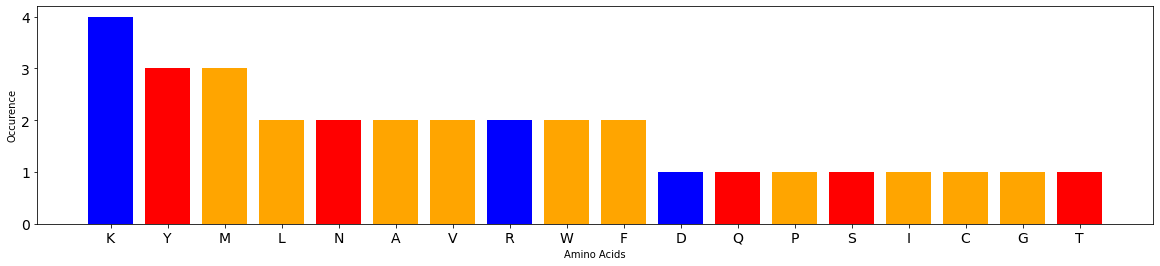

In [54]:
frequent_mut_rbd = get_mutations(493, mut_resi_rbd) + get_mutations(477, mut_resi_rbd) + get_mutations(490, mut_resi_rbd) + get_mutations(501, mut_resi_rbd)+ get_mutations(503, mut_resi_rbd)
properties_per_resi_barplot(frequent_mut_rbd)
#plt.savefig("/content/drive/MyDrive/CSB-Karaca-dataset/s2_f_rbd_most_freq_mutations.pdf", dpi=300)

# Selecting residues by property for visualizing on PyMOL

In [55]:
#here you can give amino acid positions on the protein, resi dictionary and which property you want to select to, 
#the method returns only the positions that matches the given property
def for_pymol(result, resi, property):
  out = []
  for i in range(len(result[0])):
    residue = resi.get(result[0][i])
    if residue_properties.get(residue) == property:
        out.append(result[0][i])

  return out

In [56]:
print(for_pymol(result_ace2, native_resi_ace2, 'non-polar'))
print(for_pymol(result_ace2, native_resi_ace2, 'polar'))
print(for_pymol(result_ace2, native_resi_ace2, 'charge'))
print(result_ace2)
print(native_resi_ace2)
print(for_pymol(result_rbd, native_resi_rbd, 'non-polar'))
print(for_pymol(result_rbd, native_resi_rbd, 'polar'))
print(for_pymol(result_rbd, native_resi_rbd, 'charge'))

[28, 45, 79, 82, 326, 354, 386]
[19, 24, 27, 41, 42, 83, 324, 325, 330]
[30, 31, 34, 35, 37, 38, 353, 355, 357, 393]
([19, 24, 27, 28, 30, 31, 34, 35, 37, 38, 41, 42, 45, 79, 82, 83, 324, 325, 326, 330, 353, 354, 355, 357, 386, 393], [9, 4, 13, 10, 8, 5, 7, 6, 10, 5, 5, 10, 3, 10, 5, 7, 6, 6, 6, 8, 9, 4, 4, 8, 6, 5])
{386: 'A', 30: 'D', 355: 'D', 38: 'D', 35: 'E', 37: 'E', 28: 'F', 326: 'G', 354: 'G', 34: 'H', 31: 'K', 353: 'K', 45: 'L', 79: 'L', 82: 'M', 330: 'N', 24: 'Q', 325: 'Q', 42: 'Q', 357: 'R', 393: 'R', 19: 'S', 27: 'T', 324: 'T', 41: 'Y', 83: 'Y'}
[445, 446, 455, 456, 476, 490, 502, 503]
[453, 473, 477, 487, 489, 493, 498, 500, 501, 505]
[403, 417, 484]


# Analysis of unagreed and failed cases

In [57]:
unagreed_fail =  [0, 12, 13, 41, 42, 48, 49, 55, 56, 57, 58, 60, 63, 67, 68, 69,
                  70, 71, 72, 76, 79, 80, 85, 88, 89, 91, 105, 108, 124, 127, 133,
                  137, 138, 140, 144, 149, 154, 155, 156, 158, 159, 161, 162, 163, 
                  170, 174, 185, 186, 188, 191, 192, 195, 197, 198, 199, 200, 201, 
                  203, 207, 210, 215, 222, 224, 227, 228, 239, 243, 248, 255]


ufail_pos_ace2, native_resi_ufail_ace2, mutations_ufail_ace2, mut_resi_ufail_ace2 = get_residues('ACE2',unagreed_fail)
result_ufail_ace2 = calculate_residue(sorted(set(ufail_pos_ace2)),ufail_pos_ace2)

ufail_pos_rbd, native_resi_ufail_rbd, mutations_ufail_rbd, mut_resi_ufail_rbd = get_residues('RBD',unagreed_fail)
result_ufail_rbd = calculate_residue(sorted(set(ufail_pos_rbd)),ufail_pos_rbd)


{'polar': 7, 'non-polar': 6, 'charge': 4}
{'polar': 9, 'non-polar': 6, 'charge': 1}


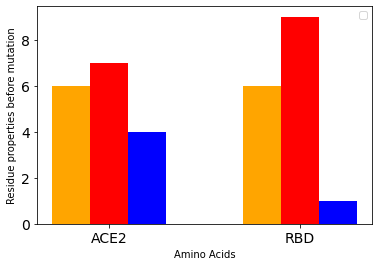

In [58]:
characters_ace2 = get_native_residues(result_ufail_ace2, native_resi_ufail_ace2)
characters_rbd = get_native_residues(result_ufail_rbd, native_resi_ufail_rbd)

y1,y2, y3 = y_axes_for_gbp([characters_ace2,characters_rbd])
group_barplotting(y1,y2,y3, ['ACE2', 'RBD'],'before')

{'non-polar': 21, 'charge': 10, 'polar': 9}
{'non-polar': 16, 'polar': 7, 'charge': 6}


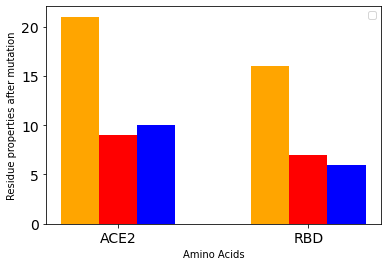

In [59]:
y1, y2, y3 = y_axes_for_gbp([mutations_ufail_ace2, mutations_ufail_rbd])
group_barplotting(y1,y2,y3, ['ACE2', 'RBD'],'after')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  app.launch_new_instance()


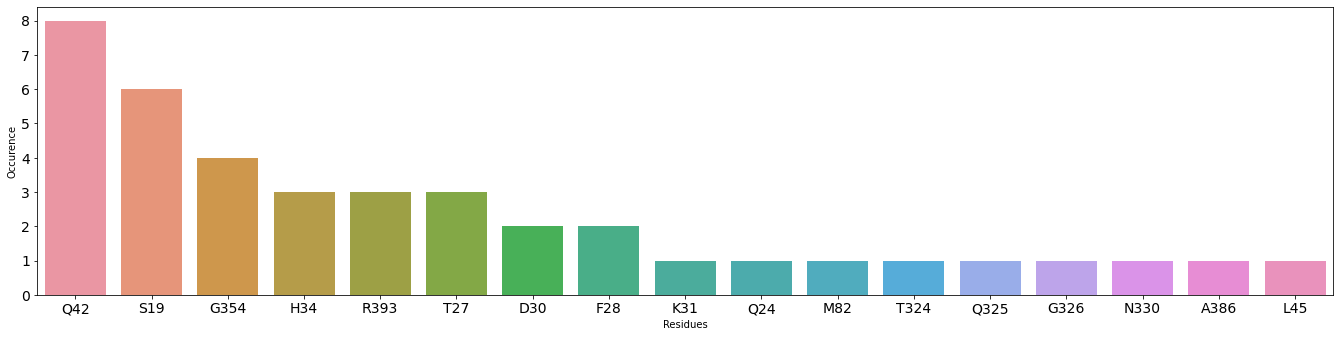

In [60]:
#number of native amino acids occurred as unagreed and failed cases on ace2
a,b =bar_plot_resi(result_ufail_ace2,native_resi_ufail_ace2)

Index(['H', 'I', 'V', 'K', 'M', 'Q', 'L', 'C', 'F', 'S', 'Y', 'W', 'T', 'N',
       'D', 'R', 'P', 'A'],
      dtype='object')
[5 4 4 3 3 2 2 2 2 2 2 2 2 1 1 1 1 1]


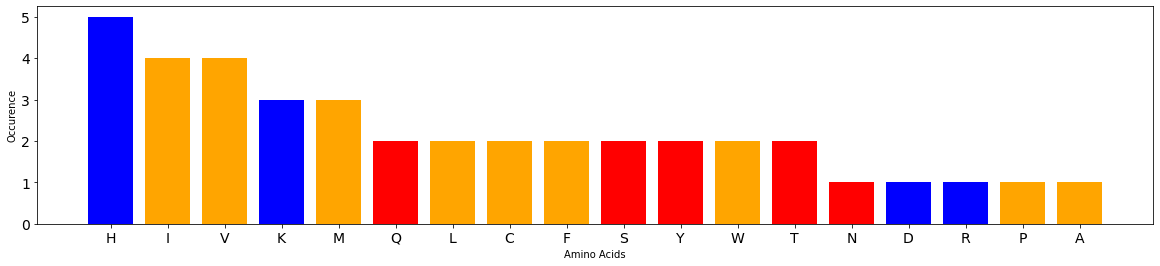

In [61]:
properties_per_resi_barplot(mutations_ufail_ace2)

In [62]:
#a,b = bar_plot_resi(result_ufail_rbd, native_resi_ufail_rbd)

# Predictors distinct success analysis

In [63]:
def distinct_depleting_enriching_count(indices):
  count_enrich, count_deplet = 0,0
  for i in indices:
    if dataset['mutation_type'][i] == 'E':
      count_enrich +=1
    else:
      count_deplet +=1
  
  print('enrich count: ', count_enrich)
  print('deplet count: ', count_deplet)

##HADDOCK

26
Index(['P', 'V', 'N', 'S', 'I', 'Y', 'F', 'W', 'K', 'M', 'H', 'C', 'Q', 'L',
       'A'],
      dtype='object')
[4 2 2 2 2 2 2 2 2 1 1 1 1 1 1]
enrich count:  20
deplet count:  6


,#case_id,protein,mutation_type,exp_binding,HADDOCK_ddg,HADDOCK_succ_rate,FoldX_ddg,FoldX_succ_rate,FoldXwater_ddg,FoldXwater_succ_rate,EvoEF1_ddg,EvoEF1_succ_rate,MutaBind2_ddg,MutaBind2_succ_rate,SSIPe_ddg,SSIPe_succ_rate,volume_change,hydrophobicity_change,flexibility,physicochem_class_change
191,S19F,ACE2,E,1.132170,-0.4080,1,0.06,0,0.03,0,0.00,1,0.16,0,-0.127,1,0.46094,1.37,0,polarity_loss
192,S19I,ACE2,E,0.771411,-2.3352,1,0.04,0,0.02,0,0.00,1,0.20,0,0.259,0,0.28467,1.56,6,polarity_loss
193,S19L,ACE2,RD,-0.494505,1.5816,1,0.04,1,0.04,1,0.00,1,0.17,1,-0.477,0,0.28672,1.24,6,polarity_loss
194,S19N,ACE2,RD,-0.388530,3.5939,1,0.07,1,0.04,1,0.00,1,0.09,1,0.848,1,0.13768,-0.60,0,no_change
195,S19P,ACE2,E,2.327820,-2.9742,1,0.01,0,-0.02,1,0.01,0,0.19,0,1.747,0,0.13586,0.30,-1,polarity_loss
196,S19T,ACE2,E,0.719981,4.8654,0,0.00,1,0.00,1,0.00,1,0.10,0,0.126,0,0.10137,0.13,0,no_change
197,S19V,ACE2,E,1.088760,-1.2184,1,0.04,0,0.03,0,0.00,1,0.17,0,0.126,0,0.16470,1.26,0,polarity_loss
198,S19W,ACE2,E,1.069380,-1.4373,1,0.07,0,0.03,0,0.00,1,0.16,0,-0.364,1,0.70147,0.99,0,polarity_loss
199,S19Y,ACE2,E,1.049410,-1.0737,1,0.06,0,0.04,0,0.00,1,0.16,0,-0.248,1,0.51946,0.44,0,no_change
200,S477D,RBD,E,0.090000,1.3430,0,-0.08,1,-0.10,1,0.20,0,0.20,0,0.277,0,0.11847,-0.72,0,charge_gain


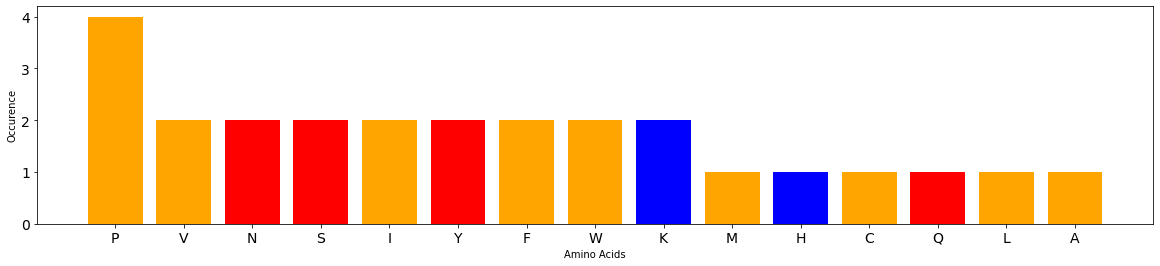

In [64]:
haddock_distinct = [0, 42, 49, 55, 58, 60, 85, 91, 108, 137, 155, 158, 170, 174, 
                    191, 192, 195, 197, 198, 199, 201, 203, 215, 222, 227, 255]

print(len(haddock_distinct))

haddock_pos_ace2, native_resi_haddock_ace2, mutations_haddock_ace2, mut_resi_haddock_ace2 = get_residues('ACE2',haddock_distinct)
result_haddock_ace2 = calculate_residue(sorted(set(haddock_pos_ace2)),haddock_pos_ace2)

haddock_pos_rbd, native_resi_haddock_rbd, mutations_haddock_rbd, mut_resi_haddock_rbd = get_residues('RBD',haddock_distinct)
result_haddock_rbd = calculate_residue(sorted(set(haddock_pos_rbd)),haddock_pos_rbd)


#amino acid frequencies after mutation
properties_per_resi_barplot(mutations_haddock_ace2 + mutations_haddock_rbd)
plt.savefig("/content/drive/MyDrive/CSB-Karaca-dataset/HADDOCK_distinct_resi.pdf", dpi=300)
distinct_depleting_enriching_count(haddock_distinct)

dataset[191:204]

{'polar': 4, 'non-polar': 3, 'charge': 2}
{'polar': 5, 'non-polar': 2, 'charge': 1}


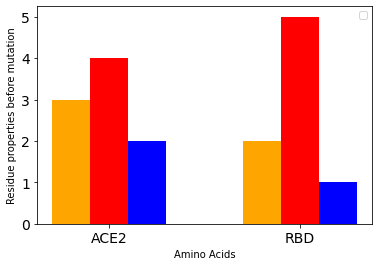

In [65]:
#amino acid properties before mutation
native_haddock_ace2 = get_native_residues(result_haddock_ace2, native_resi_haddock_ace2)
native_haddock_rbd = get_native_residues(result_haddock_rbd, native_resi_haddock_rbd)

y1,y2, y3 = y_axes_for_gbp([native_haddock_ace2,native_haddock_rbd])
group_barplotting(y1,y2,y3, ['ACE2', 'RBD'],'before')
plt.savefig("/content/drive/MyDrive/CSB-Karaca-dataset/HADDOCK_by_property.pdf", dpi=300)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  app.launch_new_instance()


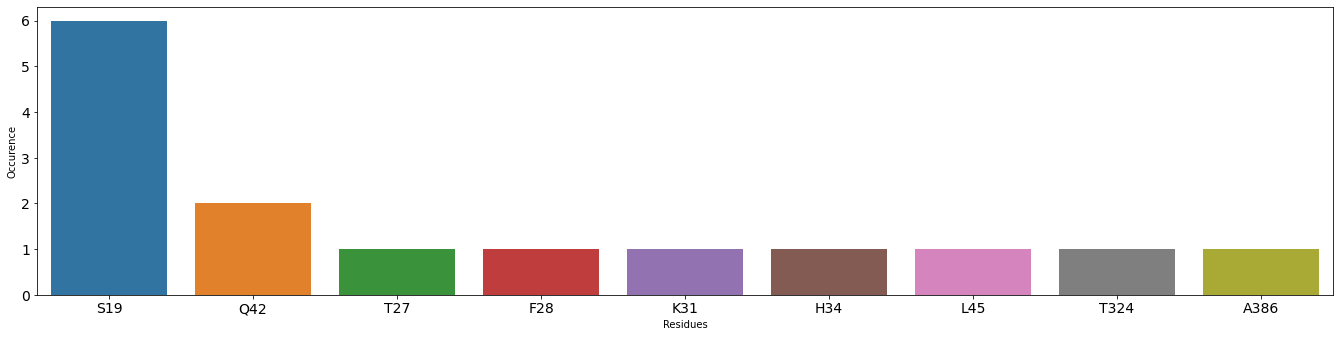

(['S19', 'T27', 'F28', 'K31', 'H34', 'Q42', 'L45', 'T324', 'A386'],
 [6, 1, 1, 1, 1, 2, 1, 1, 1])

In [66]:
bar_plot_resi(result_haddock_ace2,native_resi_haddock_ace2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  app.launch_new_instance()


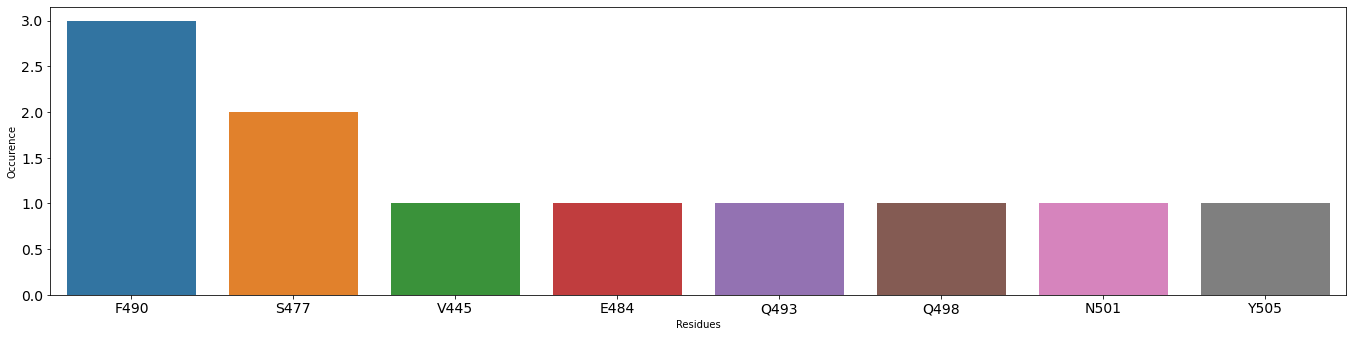

(['V445', 'S477', 'E484', 'F490', 'Q493', 'Q498', 'N501', 'Y505'],
 [1, 2, 1, 3, 1, 1, 1, 1])

In [67]:
bar_plot_resi(result_haddock_rbd,native_resi_haddock_rbd)

In [68]:
print(for_pymol(result_haddock_ace2,native_resi_haddock_ace2, 'non-polar' ))
print(for_pymol(result_haddock_ace2,native_resi_haddock_ace2, 'polar' ))
print(for_pymol(result_haddock_ace2,native_resi_haddock_ace2, 'charge' ))
print()
print(for_pymol(result_haddock_rbd,native_resi_haddock_rbd, 'non-polar' ))
print(for_pymol(result_haddock_rbd,native_resi_haddock_rbd, 'polar' ))
print(for_pymol(result_haddock_rbd,native_resi_haddock_rbd, 'charge' ))

[28, 45, 386]
[19, 27, 42, 324]
[31, 34]

[445, 490]
[477, 493, 498, 501, 505]
[484]


##FoldX

Index(['M', 'D', 'T', 'K', 'H', 'V', 'L', 'F', 'I', 'C', 'Q', 'R', 'P', 'Y'], dtype='object')
[3 3 3 2 2 2 2 2 2 1 1 1 1 1]
enrich count:  13
deplet count:  13


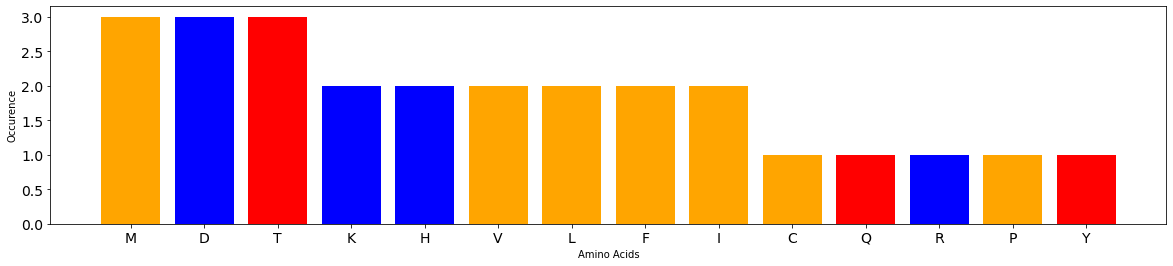

In [69]:
foldx_distinct = [12, 13, 41, 56, 57, 63, 67, 68, 70, 72, 76, 79, 80, 127, 
                  138, 140, 144, 154, 156, 159, 161, 162, 200, 207, 239, 243]


foldx_pos_ace2, native_resi_foldx_ace2, mutations_foldx_ace2, mut_resi_foldx_ace2 = get_residues('ACE2',foldx_distinct)
result_foldx_ace2 = calculate_residue(sorted(set(foldx_pos_ace2)),foldx_pos_ace2)

foldx_pos_rbd, native_resi_foldx_rbd, mutations_foldx_rbd, mut_resi_foldx_rbd = get_residues('RBD',foldx_distinct)
result_foldx_rbd = calculate_residue(sorted(set(foldx_pos_rbd)),foldx_pos_rbd)

#amino acid frequencies after mutation
properties_per_resi_barplot(mutations_foldx_ace2 + mutations_foldx_rbd)
plt.savefig("/content/drive/MyDrive/CSB-Karaca-dataset/FoldX_distinct_resi.pdf", dpi=300)
distinct_depleting_enriching_count(foldx_distinct)


{'polar': 4, 'non-polar': 2, 'charge': 1}
{'polar': 3, 'non-polar': 3, 'charge': 1}


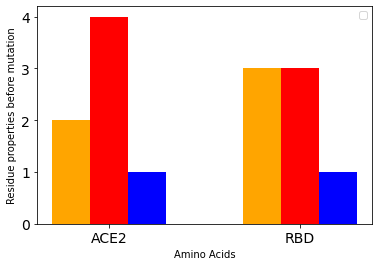

In [70]:
#amino acid properties before mutation
native_foldx_ace2 = get_native_residues(result_foldx_ace2, native_resi_foldx_ace2)
native_foldx_rbd = get_native_residues(result_foldx_rbd, native_resi_foldx_rbd)

y1,y2, y3 = y_axes_for_gbp([native_foldx_ace2,native_foldx_rbd])
group_barplotting(y1,y2,y3, ['ACE2', 'RBD'],'before')
plt.savefig("/content/drive/MyDrive/CSB-Karaca-dataset/FoldX_by_property.pdf", dpi=300)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  app.launch_new_instance()


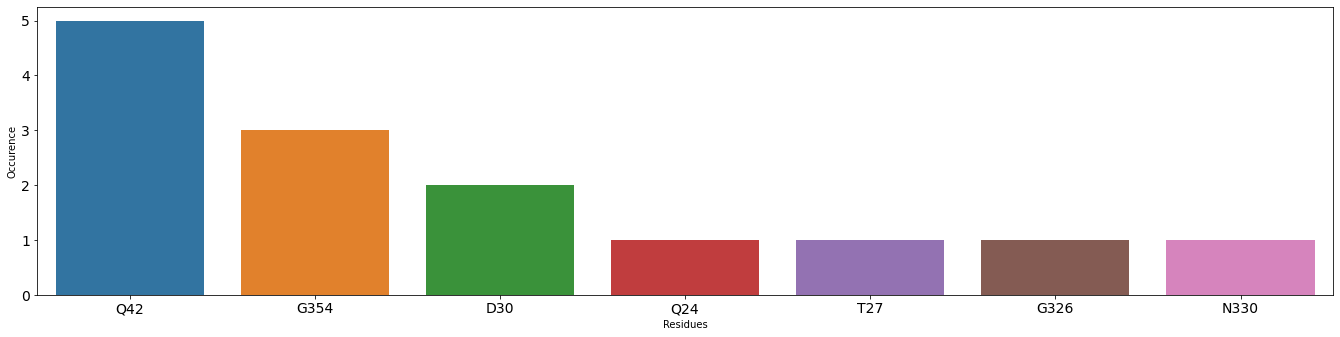

(['Q24', 'T27', 'D30', 'Q42', 'G326', 'N330', 'G354'], [1, 1, 2, 5, 1, 1, 3])

In [71]:
bar_plot_resi(result_foldx_ace2,native_resi_foldx_ace2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  app.launch_new_instance()


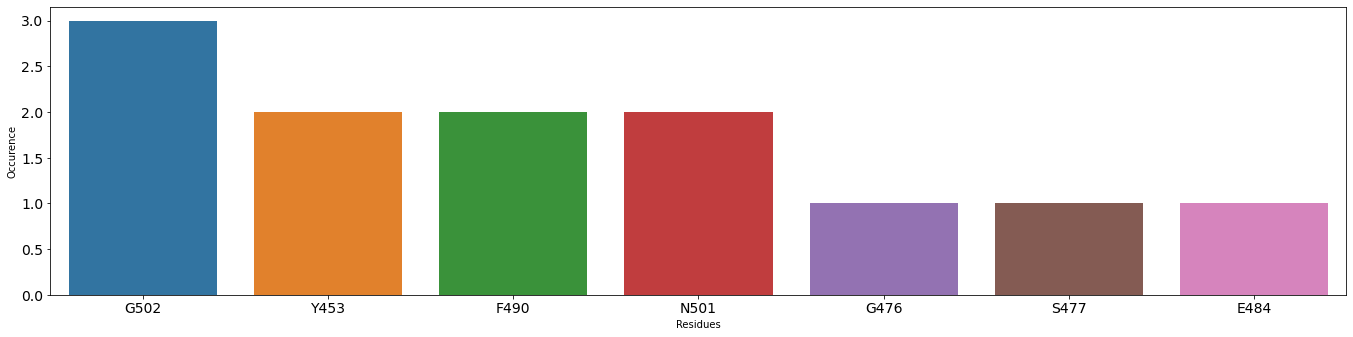

(['Y453', 'G476', 'S477', 'E484', 'F490', 'N501', 'G502'],
 [2, 1, 1, 1, 2, 2, 3])

In [72]:
bar_plot_resi(result_foldx_rbd,native_resi_foldx_rbd)

In [73]:
print(for_pymol(result_foldx_ace2,native_resi_foldx_ace2, 'non-polar' ))
print(for_pymol(result_foldx_ace2,native_resi_foldx_ace2, 'polar' ))
print(for_pymol(result_foldx_ace2,native_resi_foldx_ace2, 'charge' ))
print()
print(for_pymol(result_foldx_rbd,native_resi_foldx_rbd, 'non-polar' ))
print(for_pymol(result_foldx_rbd,native_resi_foldx_rbd, 'polar' ))
print(for_pymol(result_foldx_rbd,native_resi_foldx_rbd, 'charge' ))



[326, 354]
[24, 27, 42, 330]
[30]

[476, 490, 502]
[453, 477, 501]
[484]


In [74]:
dataset[12:14]

,#case_id,protein,mutation_type,exp_binding,HADDOCK_ddg,HADDOCK_succ_rate,FoldX_ddg,FoldX_succ_rate,FoldXwater_ddg,FoldXwater_succ_rate,EvoEF1_ddg,EvoEF1_succ_rate,MutaBind2_ddg,MutaBind2_succ_rate,SSIPe_ddg,SSIPe_succ_rate,volume_change,hydrophobicity_change,flexibility,physicochem_class_change
12,D30T,ACE2,E,0.537893,14.0068,0,-0.67,1,0.30,0,0.72,0,0.38,0,0.259,0,-0.01710,0.85,0,charge_loss
13,D30V,ACE2,E,1.237760,8.8213,0,-1.18,1,0.07,0,0.61,0,0.62,0,0.214,0,0.04623,1.98,0,charge_loss


##EvoEF1

Index(['M', 'H', 'S', 'Q', 'L', 'D', 'R', 'F', 'V', 'A', 'W', 'K'], dtype='object')
[2 2 2 2 2 1 1 1 1 1 1 1]
enrich count:  9
deplet count:  8


,#case_id,protein,mutation_type,exp_binding,HADDOCK_ddg,HADDOCK_succ_rate,FoldX_ddg,FoldX_succ_rate,FoldXwater_ddg,FoldXwater_succ_rate,EvoEF1_ddg,EvoEF1_succ_rate,MutaBind2_ddg,MutaBind2_succ_rate,SSIPe_ddg,SSIPe_succ_rate,volume_change,hydrophobicity_change,flexibility,physicochem_class_change
248,Y489F,RBD,RD,-0.95,-5.7872,0,-0.35,0,-0.58,0,0.38,1,0.28,1,0.925,1,-0.05852,0.93,0,polarity_loss


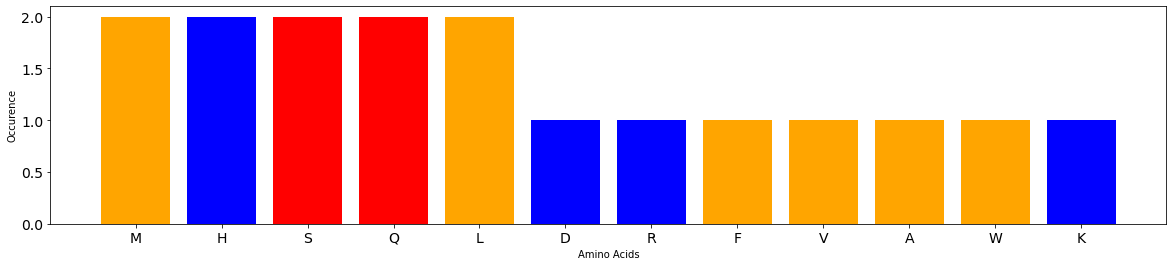

In [75]:
evoef_distinct = [48, 69, 71, 88, 89, 105, 124, 133, 149, 163, 185, 186, 188, 210, 224, 228, 248]

evoef_pos_ace2, native_resi_evoef_ace2, mutations_evoef_ace2, mut_resi_evoef_ace2 = get_residues('ACE2',evoef_distinct)
result_evoef_ace2 = calculate_residue(sorted(set(evoef_pos_ace2)),evoef_pos_ace2)

evoef_pos_rbd, native_resi_evoef_rbd, mutations_evoef_rbd, mut_resi_evoef_rbd = get_residues('RBD',evoef_distinct)
result_evoef_rbd = calculate_residue(sorted(set(evoef_pos_rbd)),evoef_pos_rbd)

#amino acid frequencies after mutation
properties_per_resi_barplot(mutations_evoef_ace2 + mutations_evoef_rbd)
plt.savefig("/content/drive/MyDrive/CSB-Karaca-dataset/EvoEF1_distinct_resi.pdf", dpi=300)
distinct_depleting_enriching_count(evoef_distinct)
dataset[248:249]

In [76]:
print(for_pymol(result_evoef_ace2,native_resi_evoef_ace2, 'non-polar' ))
print(for_pymol(result_evoef_ace2,native_resi_evoef_ace2, 'polar' ))
print(for_pymol(result_evoef_ace2,native_resi_evoef_ace2, 'charge' ))
print()
print(for_pymol(result_evoef_rbd,native_resi_evoef_rbd, 'non-polar' ))
print(for_pymol(result_evoef_rbd,native_resi_evoef_rbd, 'polar' ))
print(for_pymol(result_evoef_rbd,native_resi_evoef_rbd, 'charge' ))

[28, 82, 354]
[27, 42, 325]
[34, 393]

[445, 446, 455]
[487, 489, 500]
[]


{'polar': 3, 'non-polar': 3, 'charge': 2}
{'polar': 3, 'non-polar': 3}


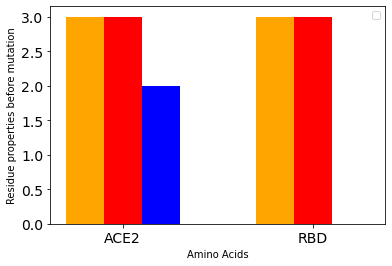

In [77]:
#amino acid properties before mutation
native_evoef_ace2 = get_native_residues(result_evoef_ace2, native_resi_evoef_ace2)
native_evoef_rbd = get_native_residues(result_evoef_rbd, native_resi_evoef_rbd)

y1,y2, y3 = y_axes_for_gbp([native_evoef_ace2,native_evoef_rbd])
group_barplotting(y1,y2,y3, ['ACE2', 'RBD'],'before')
plt.savefig("/content/drive/MyDrive/CSB-Karaca-dataset/EvoEF1_by_property.pdf", dpi=300)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  app.launch_new_instance()


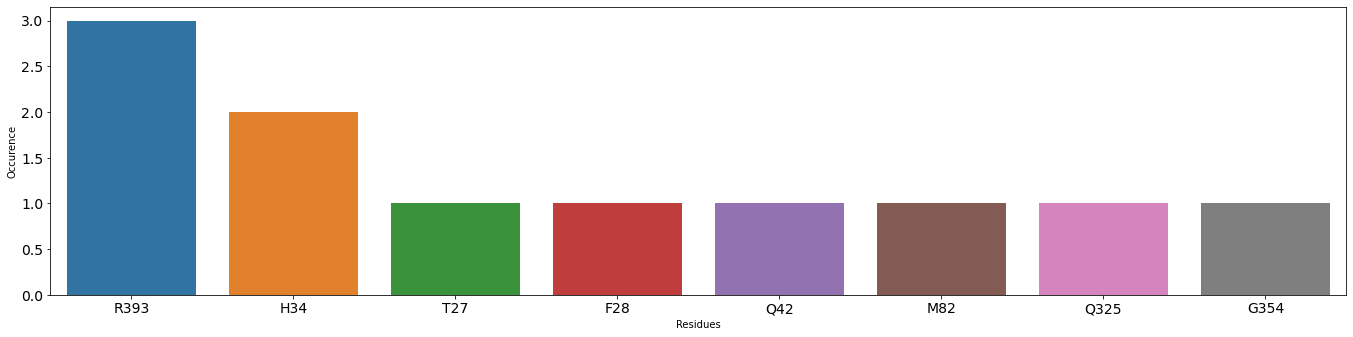

(['T27', 'F28', 'H34', 'Q42', 'M82', 'Q325', 'G354', 'R393'],
 [1, 1, 2, 1, 1, 1, 1, 3])

In [78]:
bar_plot_resi(result_evoef_ace2,native_resi_evoef_ace2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  app.launch_new_instance()


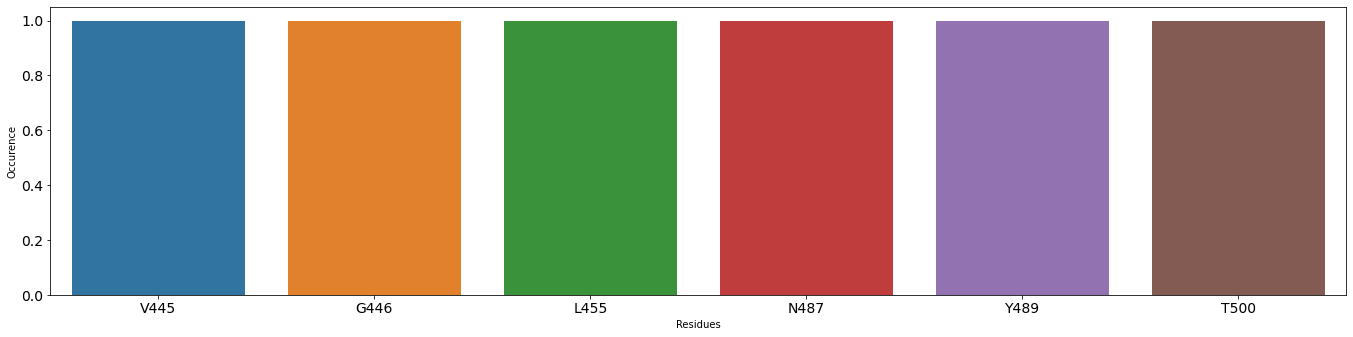

(['V445', 'G446', 'L455', 'N487', 'Y489', 'T500'], [1, 1, 1, 1, 1, 1])

In [79]:
bar_plot_resi(result_evoef_rbd,native_resi_evoef_rbd)